In [161]:
import pandas as pd

dados = pd.read_csv("https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv")

In [162]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [163]:
dados.sample()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
1807,NaN,Cambuci,São Paulo,95,2,2,1,R$ 750.000


In [164]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


## Desafios aula 01:

1 - Realizar a média da metragem para cara um dos bairros (Paulo)

2 - 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

4 - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

### 1 - Realizar a média da metragem para cara um dos bairros (Paulo)

In [165]:
metragem_media_bairro = dados.groupby('Bairro').mean()['Metragem'].sort_values(ascending=False)
metragem_media_bairro

Bairro
Sítio Represa                         37000.000000
Vila Castelo                           2850.000000
Jardim Guedala                         2486.640199
Jardim das Camélias                    1700.000000
Chácara Flora                          1260.727273
                                          ...     
Cidade Antônio Estevão de Carvalho       57.500000
Jardim Nova Germania                     57.000000
Jardim Benfica                           48.000000
Vila Leonor                              46.000000
Vila Guaca                               10.000000
Name: Metragem, Length: 701, dtype: float64

### 2 - 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

In [166]:
# Forma 01 - Consultar entradas de um bairro específico:
item = "Sítio Represa"

dados[dados["Bairro"] == item]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000


In [167]:
# Forma 02 - Usar o índice da linha:

dados.iloc[6600,:]

Rua          Rua Benedito Felizardo
Bairro                Sítio Represa
Cidade                    São Paulo
Metragem                      37000
Quartos                           4
Banheiros                         2
Vagas                             4
Valor                  R$ 2.900.000
Name: 6600, dtype: object

### 3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

<AxesSubplot:title={'center':'15 maiores médias de metros quadrados de imóveis'}, xlabel='Bairros', ylabel='Metros quadrados'>

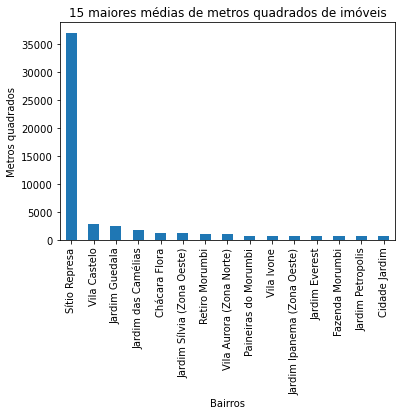

In [168]:
# Plotar a média de metros quadros de imóveis por bairros
metragem_media_bairro[:15].plot.bar(xlabel = 'Bairros', ylabel = 'Metros quadrados',
    title = '15 maiores médias de metros quadrados de imóveis')

O maior valor corresponde ao Sítio Represa, por se tratar de um sítio, é de se esperar que a área realmente seja bem superior aos padrões encontrados nas casas e apartamentos

### Quantidade de imóvel por bairro

<AxesSubplot:>

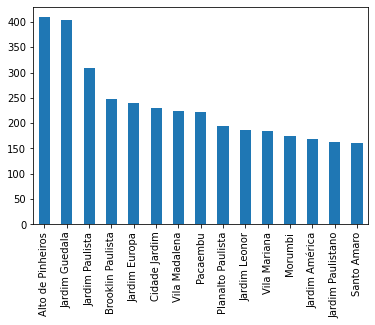

In [169]:
dados['Bairro'].value_counts()[:15].plot(kind='bar')

### Histogramas de metragem, quartos, banheiros e vagas

<AxesSubplot:ylabel='Frequency'>

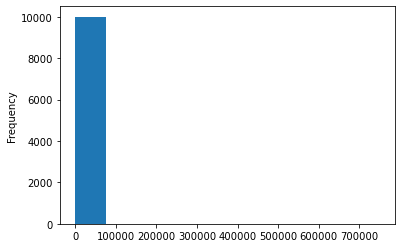

In [170]:
dados['Metragem'].plot(kind = 'hist')


<AxesSubplot:ylabel='Frequency'>

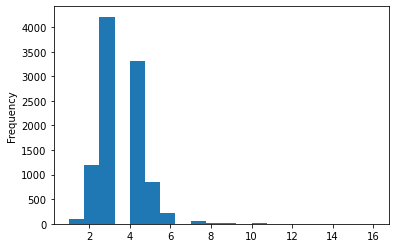

In [171]:
dados['Quartos'].plot(kind = 'hist', bins = 20)

<AxesSubplot:ylabel='Frequency'>

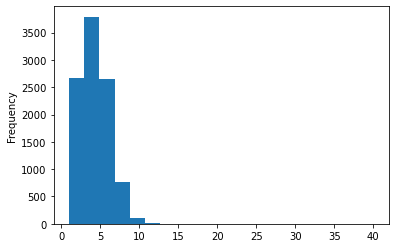

In [172]:
dados['Banheiros'].plot(kind = 'hist', bins = 20)

<AxesSubplot:ylabel='Frequency'>

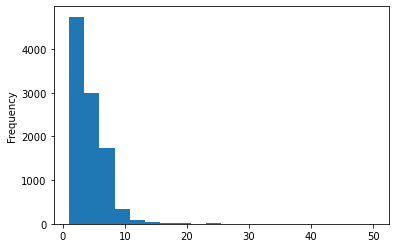

In [173]:
dados['Vagas'].plot(kind = 'hist', bins = 20)

### 4 - Pegar outros estatísticas dos dados, média, mediana, min, max (Vivi)

In [174]:
dados[['Metragem', 'Quartos', 'Banheiros', 'Vagas']].describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


In [175]:
# Mediana
mediana = dados[['Metragem', 'Quartos', 'Banheiros', 'Vagas']].median()
print(f'A mediana dos dados é: \n{mediana}')

A mediana dos dados é: 
Metragem     290.0
Quartos        3.0
Banheiros      4.0
Vagas          4.0
dtype: float64


### 5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

In [176]:
dados[dados['Rua'].isna()]['Bairro'].value_counts()

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64

Portanto, acima está o número de ocorrência de imóveis com rua sem nome, somadas por bairro.